In [1]:
## Kiva dataset and KPI analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#KPI 1. Loan Distribution
# 1.1 Loan Distribution by World Region
# 1.2 Loan Distribution by Sector and Rural_Pct
# 1.3 Loan Distribution by Region and Sector

In [4]:
#Load required data
loan_themes_by_region = pd.read_csv(r"C:\Users\DELL\Downloads\archive (1)\loan_themes_by_region.csv")
kiva_mpi_region_location = pd.read_csv(r"C:\Users\DELL\Downloads\archive (1)\kiva_mpi_region_locations.csv")

In [5]:
# Clean and merge the two dataframes
kiva_mpi_region_location_subset = kiva_mpi_region_location[["country", "world_region"]].drop_duplicates()

kiva_mpi_region_location_subset = kiva_mpi_region_location_subset.dropna(subset=["country"])  # Drop rows where 'country' is null
kiva_mpi_region_location_subset = kiva_mpi_region_location_subset[kiva_mpi_region_location_subset["country"] != ""]

loan_themes_by_region_subset = loan_themes_by_region[["Field Partner Name","sector", "Loan Theme Type", "country", "region", "amount", "rural_pct"]]
loan_themes_by_region_world = pd.merge(loan_themes_by_region_subset, kiva_mpi_region_location_subset, on = "country", how = "left")

In [6]:
#Group by world region and find the sum and percentage for each region
amount_by_world_region = loan_themes_by_region_world.groupby("world_region")["amount"].sum()
amount_by_world_region = amount_by_world_region.reset_index()
total_amount = amount_by_world_region["amount"].sum()
amount_by_world_region["pct_distribution"] = (amount_by_world_region["amount"] / total_amount) * 100
amount_by_world_region

,world_region,amount,pct_distribution
0,Arab States,3950225,1.691290
1,East Asia and the Pacific,52824325,22.616754
2,Europe and Central Asia,22207275,9.508053
3,Latin America and Caribbean,74451775,31.876555
4,South Asia,12497700,5.350895
5,Sub-Saharan Africa,67631500,28.956452


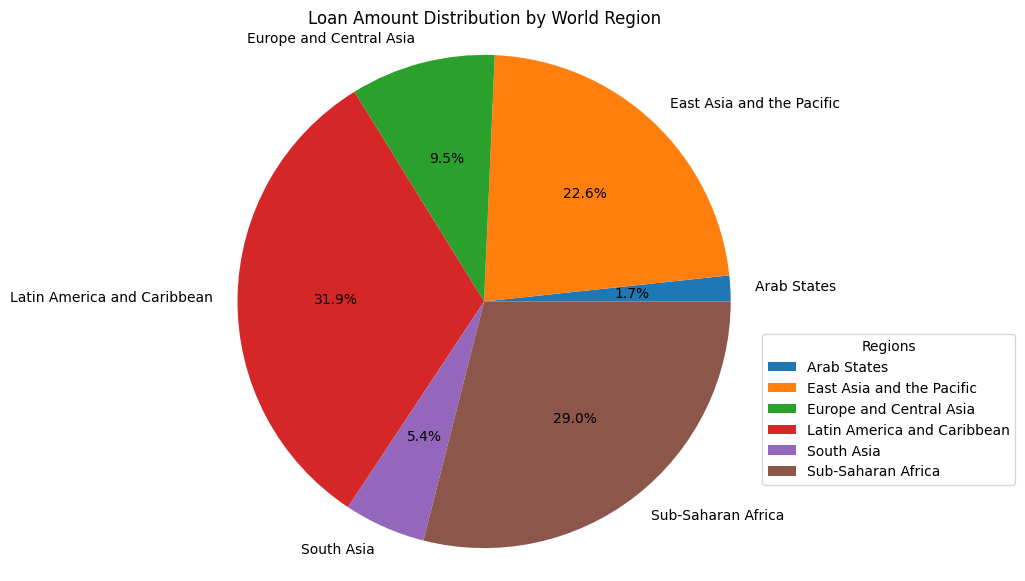

In [7]:
# KPI: 1.1 Loan Distribution by World Region

plt.figure(figsize = (7, 7))
plt.pie(amount_by_world_region["pct_distribution"], labels = amount_by_world_region["world_region"], autopct = '%1.1f%%')
plt.title('Loan Amount Distribution by World Region')
plt.axis('equal')
plt.legend(amount_by_world_region["world_region"], title = "Regions", loc = "center left", bbox_to_anchor = (1, 0.3))
plt.show()

In [8]:
# KPI: 1.2 Loan Distribution by Sector and Rural_Pct
sector_analysis = loan_themes_by_region_world.groupby("sector", as_index = False).agg(amount = ("amount","sum"), average_rural_pct=("rural_pct","mean"))
sector_analysis

,sector,amount,average_rural_pct
0,Agriculture,7811450,98.291188
1,Artisan,897675,2.702703
2,Clean Energy,3513325,82.187605
3,DSE Direct,1983500,75.000000
4,Education,2222600,77.350000
5,General Financial Inclusion,287514175,67.878544
6,Health,9725,85.000000
7,Mobile Money and ICT,1078050,28.100000
8,Other,4440050,53.547619
9,SME Financial Inclusion,1605550,37.535714


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


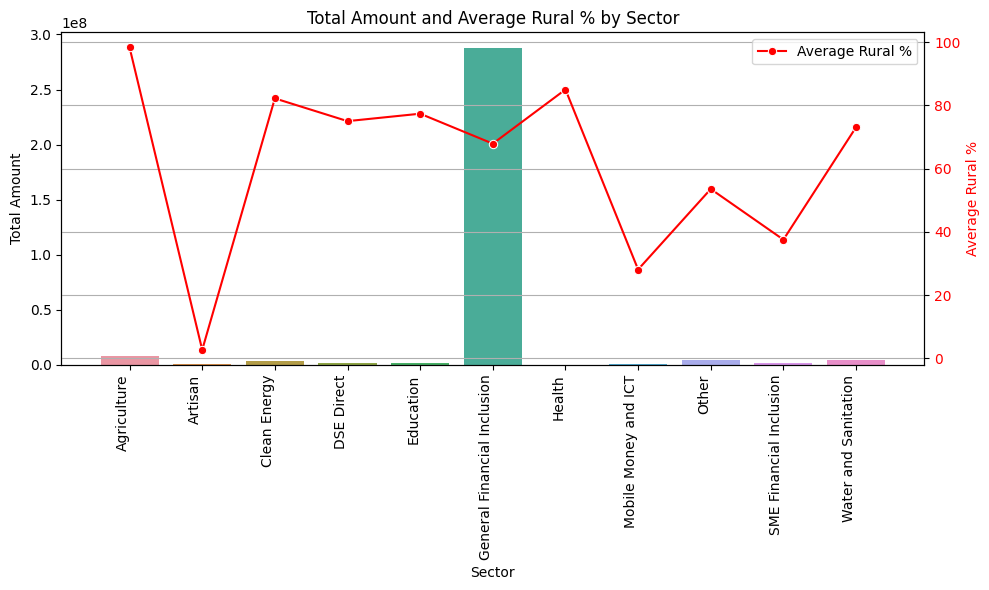

In [9]:
# Visualise the KPI using a grouped barchart with a line chart overlay

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for amount
sns.barplot(x = "sector", y = "amount", data = sector_analysis, ax = ax1)
ax1.set_xlabel("Sector")
ax1.set_ylabel("Total Amount")
ax1.tick_params(axis = "y")

# Create a second y-axis for rural_pct
ax2 = ax1.twinx()

# Line plot for rural_pct
sns.lineplot(x = "sector", y = "average_rural_pct", data = sector_analysis, color = "red", marker = "o", ax = ax2, label = "Average Rural %")
ax2.set_ylabel('Average Rural %', color = "red")
ax2.tick_params(axis = "y", labelcolor = "red")

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc = "best")


# Add title and grid
plt.title("Total Amount and Average Rural % by Sector")
plt.grid(axis = "y")  # Grid on the bar plot's y-axis
ax1.set_xticklabels(sector_analysis["sector"], rotation = 90, ha = 'right')
plt.tight_layout()
plt.show()


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Arab States'),
  Text(1, 0, 'East Asia and the Pacific'),
  Text(2, 0, 'Europe and Central Asia'),
  Text(3, 0, 'Latin America and Caribbean'),
  Text(4, 0, 'South Asia'),
  Text(5, 0, 'Sub-Saharan Africa')])

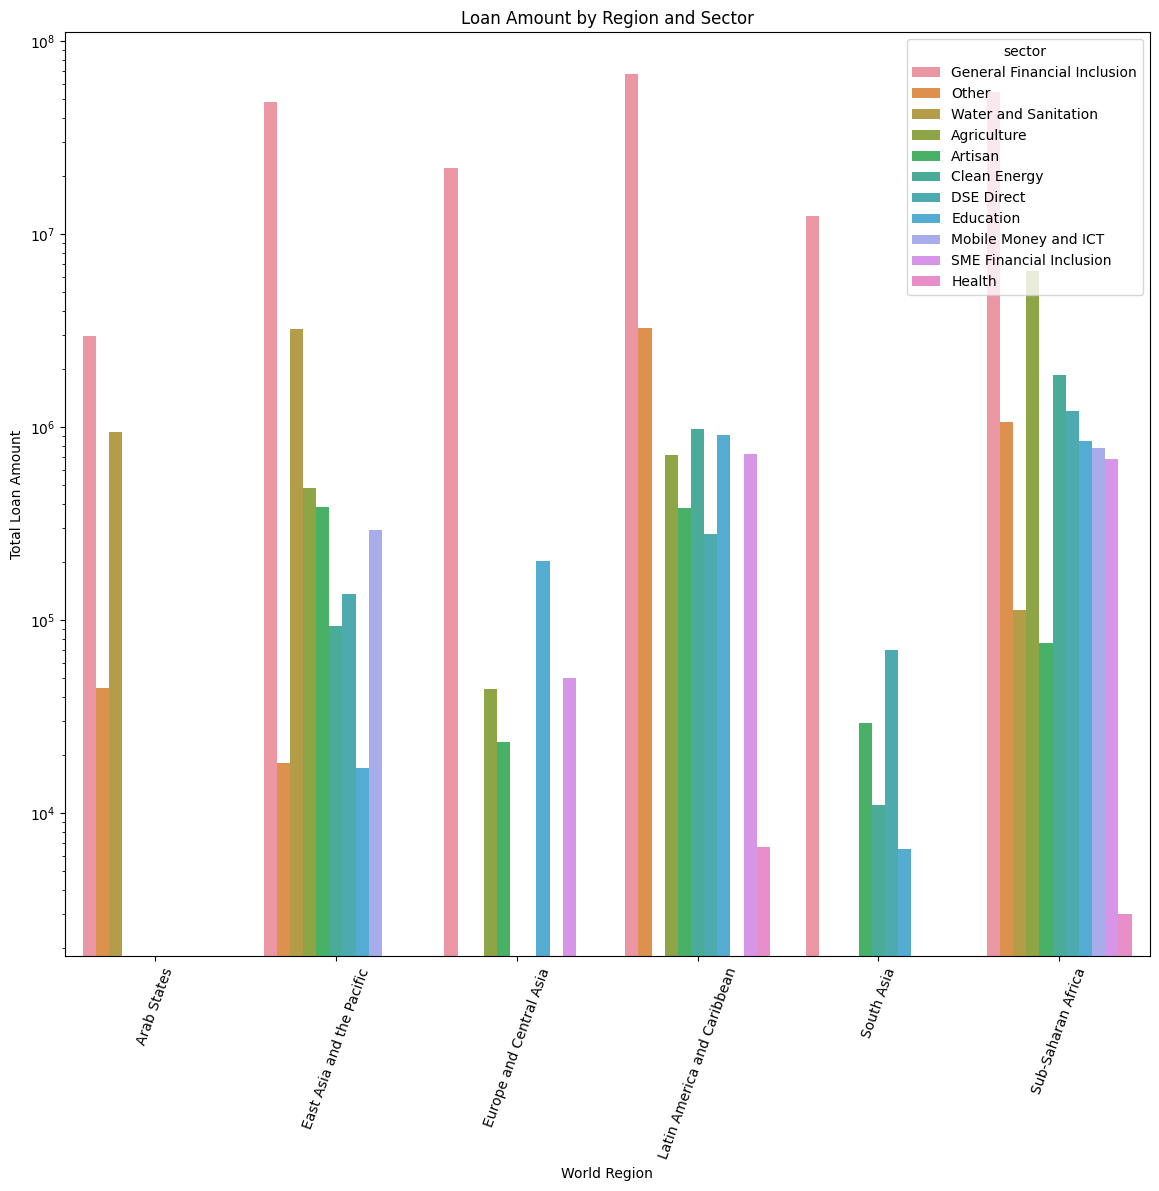

In [10]:
# KPI: 1.3 Loan Distribution by Region and Sector
amount_by_region_sector = loan_themes_by_region_world.groupby(["world_region", "sector"], as_index = False)["amount"].sum()
plt.figure(figsize = (14, 12))
sns.barplot(data = amount_by_region_sector, x  = "world_region", y = "amount", hue = "sector")
plt.title("Loan Amount by Region and Sector")
plt.xlabel("World Region")
plt.ylabel("Total Loan Amount")
plt.yscale("log")
plt.xticks(rotation = 70)

In [11]:
#KPI 2. Loan Distribution by Gender
# 2.1 Loan Amount by Gender
# 2.2 Loan Term Distribution by Gender
# 2.3 Loan Amount by Gender and Sector
# 2.4 Loan Repayment Interval by Gender

In [12]:
# Load and clean data
loan_amount_by_gender = pd.read_csv(r"C:\Users\DELL\Downloads\archive (1)\kiva_loans.csv")
loan_amount_by_gender = loan_amount_by_gender[["loan_amount", "borrower_genders", "activity", "sector", "repayment_interval"]]
loan_amount_by_gender["borrower_genders"] = loan_amount_by_gender["borrower_genders"].str.split(",", n = 1).str[0] #remove comma separated duplicates

In [13]:
#checking for any null values
loan_amount_by_gender.isnull().any()

loan_amount           False
borrower_genders       True
activity              False
sector                False
repayment_interval    False
dtype: bool

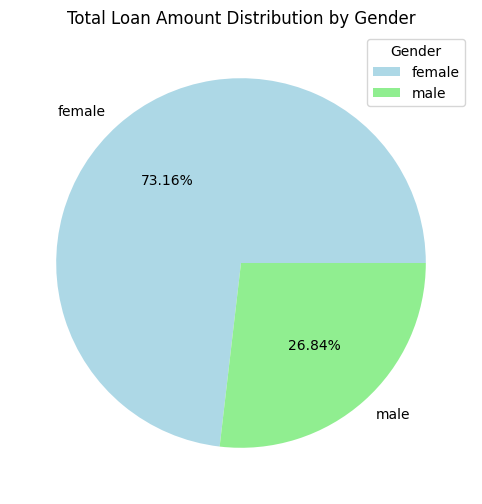

In [14]:
# KPI: 2.1 Loan Amount by Gender 
total_loan_amount_by_gender = loan_amount_by_gender.groupby("borrower_genders")["loan_amount"].sum()

plt.figure(figsize = (8, 6))
plt.pie(total_loan_amount_by_gender, labels = total_loan_amount_by_gender.index, autopct = '%1.2f%%',
        colors = ["lightblue", "lightgreen"])
plt.title("Total Loan Amount Distribution by Gender")
plt.legend(title = "Gender")
plt.show()

In [15]:
# KPI: 2.2 Loan Term Distribution by Gender
loan_term_by_gender = pd.read_csv(r"C:\Users\DELL\Downloads\archive (1)\kiva_loans.csv")

In [16]:
loan_term_by_gender["term_in_months"] = loan_term_by_gender["term_in_months"]
loan_term_by_gender["term_in_months"].value_counts()

male_terms = loan_term_by_gender[loan_term_by_gender["borrower_genders"] == "male"]["term_in_months"]
female_terms = loan_term_by_gender[loan_term_by_gender["borrower_genders"] == "female"]["term_in_months"]

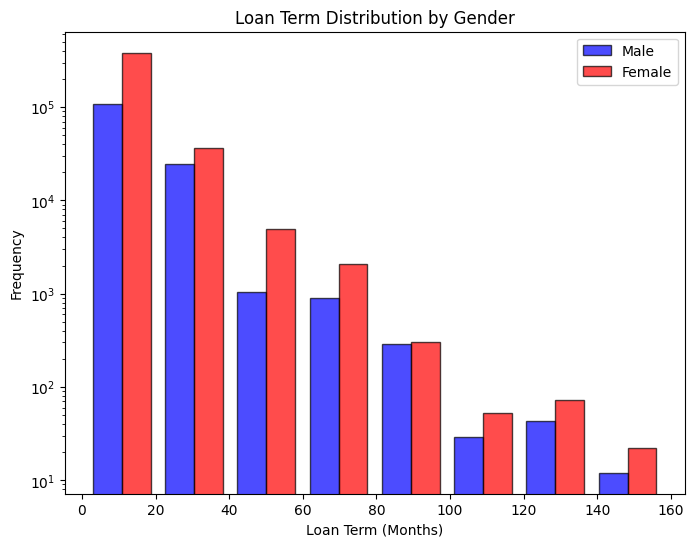

In [17]:
plt.figure(figsize = (8, 6))
plt.hist([male_terms, female_terms], bins = 8, color = ["blue", "red"], edgecolor = "black", label = ["Male", "Female"], alpha = 0.7)

plt.yscale("log") #use logarithmic scale because of large gap variations
plt.title("Loan Term Distribution by Gender")
plt.xlabel("Loan Term (Months)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [18]:
# KPI: 2.3 Loan Amount by Gender and Sector

loans_data = pd.read_csv(r"C:\Users\DELL\Downloads\archive (1)\kiva_loans.csv")
loan_by_gender_sector = loans_data[["loan_amount", "borrower_genders", "activity", "sector", "repayment_interval"]].copy()
loan_by_gender_sector["borrower_genders"] = loan_by_gender_sector["borrower_genders"].str.split(",", n = 1).str[0] #remove comma separated duplicates
loan_by_gender_sector = loan_by_gender_sector.groupby(["borrower_genders", "sector"], as_index = False)["loan_amount"].sum()

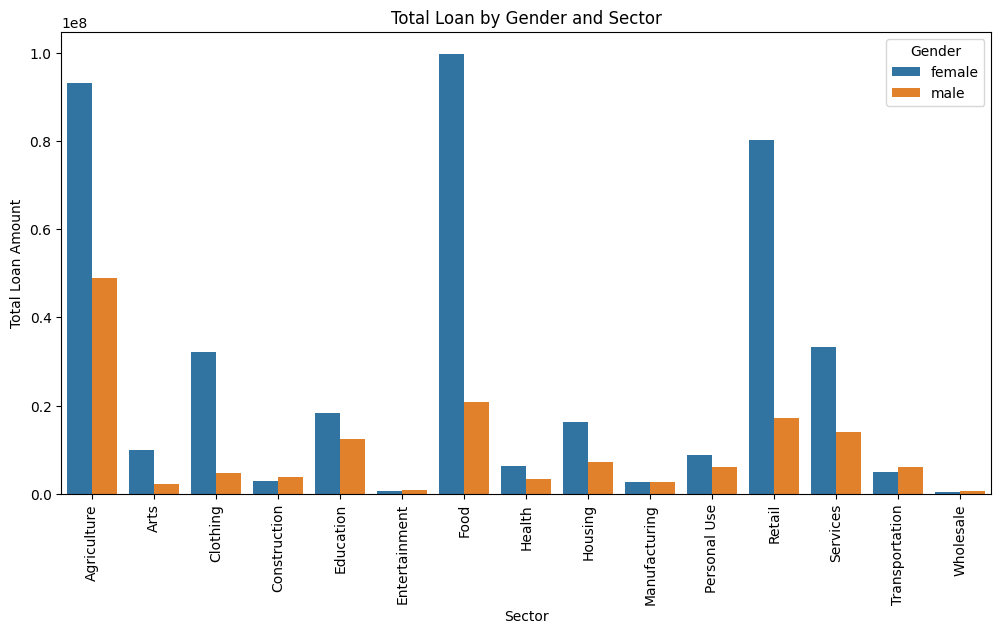

In [19]:
#grouped bar chart
plt.figure(figsize = (12, 6))
sns.barplot(data = loan_by_gender_sector, x = "sector", y = "loan_amount", hue = "borrower_genders")

plt.title("Total Loan by Gender and Sector")
plt.xlabel("Sector")
plt.ylabel("Total Loan Amount")
plt.xticks(rotation = 90)
plt.legend(title = "Gender")
plt.show()

In [20]:
#KPI 3. Loan Funding Speed
#3.1 Loan Funding Speed Per Repayment Interval
#3.2 Average Loan Funding Speed Per World region

In [21]:
loan_term_by_gender["repayment_interval"].value_counts()

repayment_interval
monthly      342717
irregular    257158
bullet        70728
weekly          602
Name: count, dtype: int64

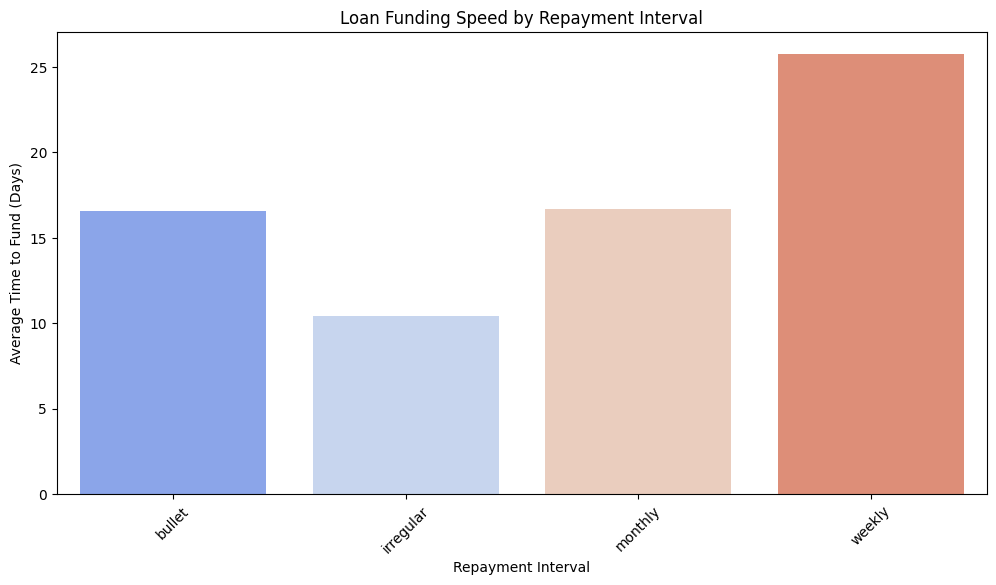

In [22]:
# Convert the time columns to datetime
loans_data["posted_time"] = pd.to_datetime(loans_data["posted_time"])
loans_data["funded_time"] = pd.to_datetime(loans_data["funded_time"])

loans_data["time_to_fund"] = (loans_data["funded_time"] - loans_data["posted_time"]).dt.days # Time to fund (in days)

fund_time_by_repayment_interval = loans_data.groupby("repayment_interval")["time_to_fund"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x = "repayment_interval", y = "time_to_fund", data = fund_time_by_repayment_interval, palette="coolwarm")
plt.title("Loan Funding Speed by Repayment Interval")
plt.xlabel("Repayment Interval")
plt.ylabel("Average Time to Fund (Days)")
plt.xticks(rotation = 45)
plt.show()


In [23]:
country_fundtime = loans_data[["country", "posted_time", "funded_time", "repayment_interval"]]
region_fundtime = kiva_mpi_region_location_subset.merge(country_fundtime, on = "country", how = "left")
region_fundtime["funding_speed"] = (region_fundtime["funded_time"] - region_fundtime["posted_time"]).dt.days # Time to fund (in days)


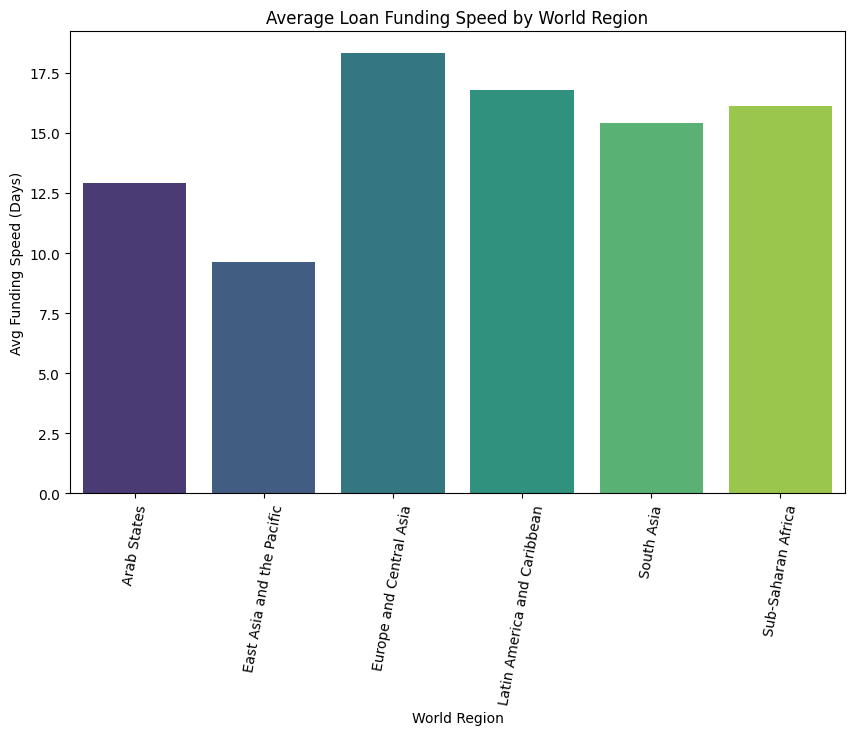

In [24]:
region_funding_speed = region_fundtime.groupby("world_region")["funding_speed"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data = region_funding_speed, x = "world_region", y = "funding_speed", palette = "viridis")
plt.title("Average Loan Funding Speed by World Region")
plt.xlabel("World Region")
plt.ylabel("Avg Funding Speed (Days)")
plt.xticks(rotation = 80)
plt.show()
